In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.optimize import curve_fit

Calibración

In [ ]:
pd_calibracion = pd.read_excel('Datos_Oscilador.xlsx', header = 1, usecols = ['Angulo (rad)', 'Vpp (V)'])
pd_calibracion = pd_calibracion.iloc[:10]
pd_calibracion = pd_calibracion.dropna(subset=['Angulo (rad)', 'Vpp (V)'])

angulo = pd_calibracion['Angulo (rad)']
vpp = pd_calibracion['Vpp (V)']

angulo_in = 0.01
vpp_in = 0.01


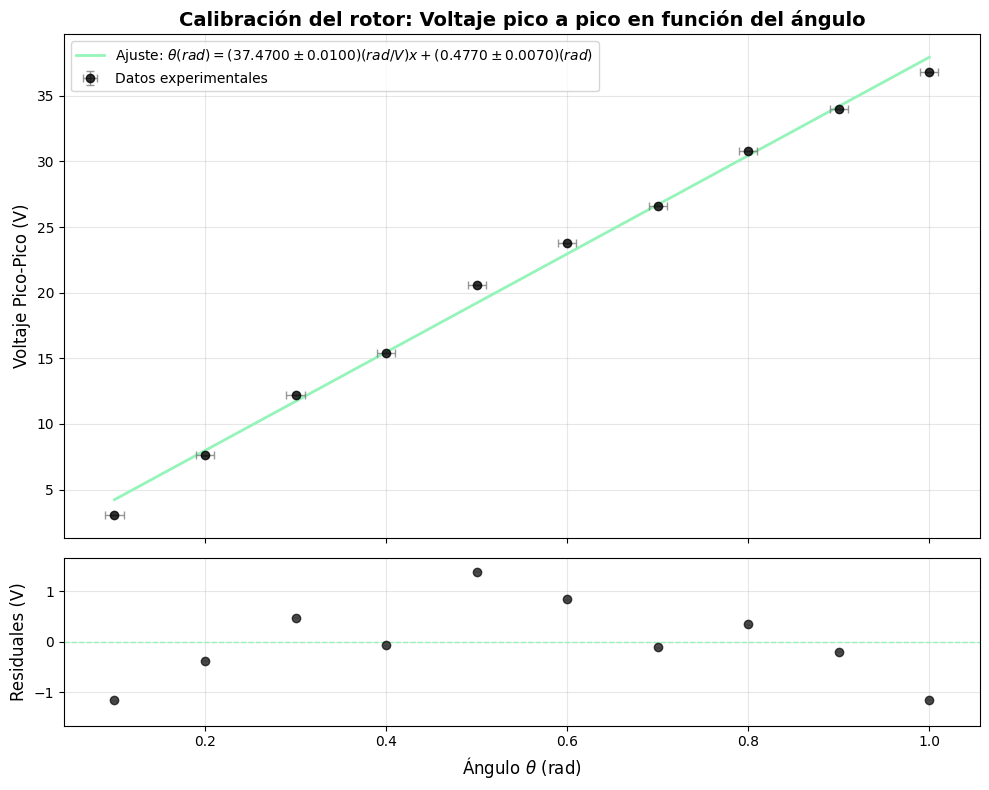


--- RESULTADOS DEL AJUSTE ---
Pendiente (m): 37.470000 ± 0.010000 V/rad
Intercepto (b): 0.477000 ± 0.007000 V
Coeficiente de determinación R²: 0.994975
Error estándar de los residuales: 0.764864 V
Chi-cuadrado reducido: 7312.7030


In [ ]:
# Convertir a numpy
angulo = pd_calibracion['Angulo (rad)'].to_numpy()
vpp    = pd_calibracion['Vpp (V)'].to_numpy()

angulo = pd.to_numeric(angulo, errors='coerce')
vpp    = pd.to_numeric(vpp, errors='coerce')

# Eliminar filas que quedaron con NaN
mask = np.isfinite(angulo) & np.isfinite(vpp)
angulo = angulo[mask]
vpp = vpp[mask]


# Modelo lineal
def f(x, m, b):
    return m * x + b

# Ajuste CON incertidumbres usando curve_fit
popt, pcov = curve_fit(f, angulo, vpp, sigma=vpp_in, absolute_sigma=True)
m, b = popt
m_err, b_err = np.sqrt(np.diag(pcov))

# Función para redondear con cifras significativas correctas
def format_with_error(value, error):
    if error == 0:
        return value, error, 2
    # 1-2 cifras significativas en el error
    err_rounded = round(error, 1 - int(np.floor(np.log10(abs(error)))))
    # número de decimales del error
    decimals = max(0, -int(np.floor(np.log10(err_rounded))))
    # redondear valor y error con esos decimales
    val_rounded = round(value, decimals)
    err_rounded = round(error, decimals)
    return val_rounded, err_rounded, decimals

m_val, m_err, _ = format_with_error(m, m_err)
b_val, b_err, _ = format_with_error(b, b_err)

# Calcular R²
y_pred = f(angulo, m, b)
resid = vpp - y_pred
ss_res = np.sum(resid**2)
ss_tot = np.sum((vpp - np.mean(vpp))**2)
r2 = 1 - (ss_res / ss_tot)

# Crear array para la línea de ajuste
_x = np.linspace(np.min(angulo), np.max(angulo), 100)
_y = f(_x, m, b)

# Configuración de la figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), 
                               gridspec_kw={'height_ratios': [3, 1]}, 
                               sharex=True)

# GRÁFICA SUPERIOR: Datos y ajuste
# Línea de ajuste
ax1.plot(_x, _y, '#95F4B9', linewidth=2,
         label=fr'Ajuste: $\theta (rad) = ({m_val:.4f} \pm {m_err:.4f}) (rad / V) \theta + ({b_val:.4f} \pm {b_err:.4f}) (rad)$')

# Barras de error en ambos ejes
ax1.errorbar(angulo, vpp, 
             xerr=angulo_in, yerr=vpp_in,
             fmt='o', color='black', 
             ecolor='gray', elinewidth=1, capsize=3,
             label='Datos experimentales',
             markersize=6, alpha=0.8)

ax1.set_ylabel('Voltaje Pico-Pico (V)', fontsize=12)
ax1.set_title('Calibración del rotor: Voltaje pico a pico en función del ángulo', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)



# Agregar R² en el gráfico
# ax1.text(0.05, 0.95, f'$R^2 = {r2:.4f}$', 
#          transform=ax1.transAxes, fontsize=12,
#          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# GRÁFICA INFERIOR: Residuales
ax2.errorbar(angulo, resid, 
             yerr=vpp_in,  # Incertidumbre en residuales = incertidumbre en y
             fmt='o', color='black', 
             ecolor='lightgray', elinewidth=1, capsize=2,
             alpha=0.7)

ax2.axhline(y=0, color='#95F4B9', linestyle='--', linewidth=1)
ax2.set_xlabel(r'Ángulo $\theta$ (rad)', fontsize=12)
ax2.set_ylabel('Residuales (V)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Ajustar límites de residuales para mejor visualización
resid_max = np.max(np.abs(resid)) * 1.2
ax2.set_ylim(-resid_max, resid_max)

plt.tight_layout()
plt.show()

# Resultados numéricos
print(f'\n--- RESULTADOS DEL AJUSTE ---')
print(f'Pendiente (m): {m_val:.6f} ± {m_err:.6f} V/rad')
print(f'Intercepto (b): {b_val:.6f} ± {b_err:.6f} V')
print(f'Coeficiente de determinación R²: {r2:.6f}')
print(f'Error estándar de los residuales: {np.std(resid):.6f} V')

# Calcular chi-cuadrado reducido
chi2 = np.sum((resid / vpp_in)**2)
chi2_red = chi2 / (len(angulo) - 2)  # grados de libertad = n - parámetros
print(f'Chi-cuadrado reducido: {chi2_red:.4f}')


Actividad 1

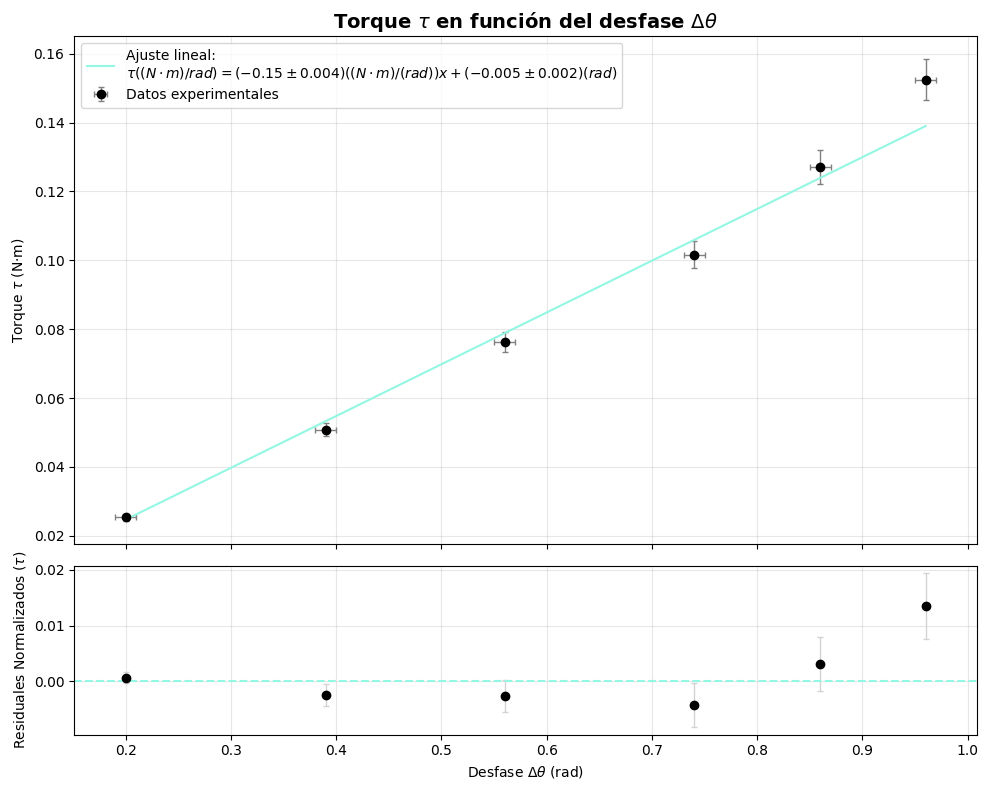

Primer conjunto - Datos: 6 puntos
Pendiente: -0.15 ± 0.004
Intercepto: -0.005 ± 0.002
R²: 0.9803


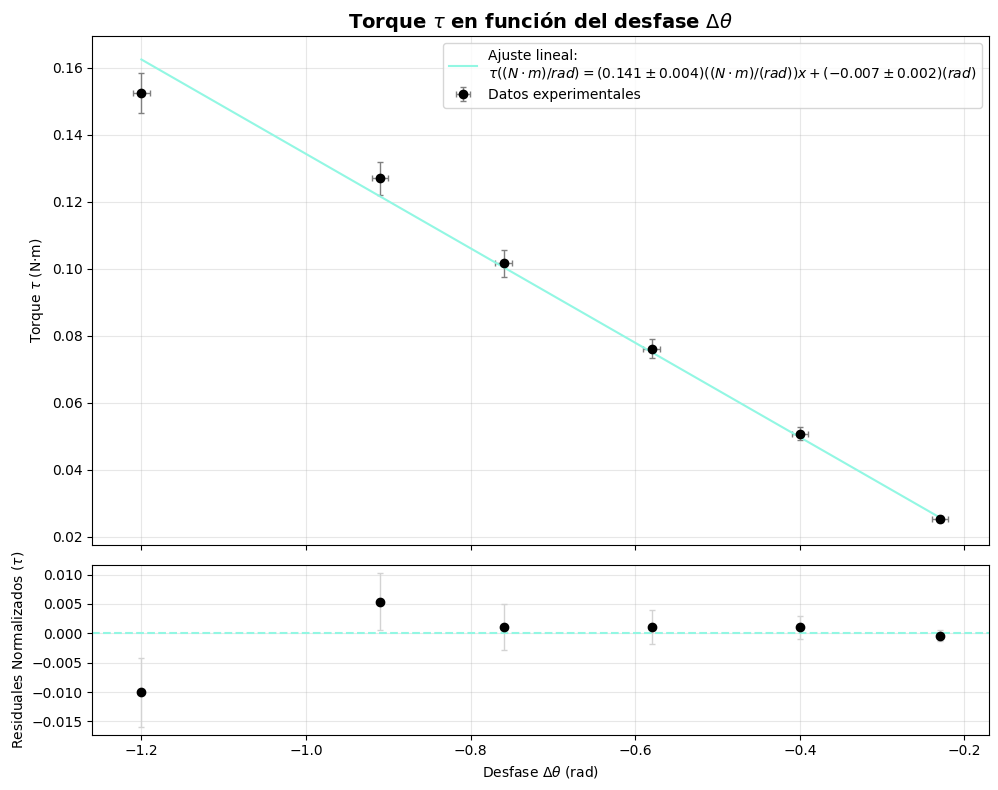


Segundo conjunto - Datos: 6 puntos
Pendiente: 0.141 ± 0.004
Intercepto: -0.007 ± 0.002
R²: 0.9881


In [ ]:
# Leer datos
pd_actividad1 = pd.read_excel('Datos_Oscilador.xlsx', header=22, usecols=['Masa total (kg)', 'Angulo desfase (rad)', 
                                     'Masa total 2 (kg)', 'Angulo desfase 2 (rad)'])
pd_actividad1 = pd_actividad1.iloc[:7]
pd_actividad1 = pd_actividad1.dropna(subset=['Masa total (kg)', 'Angulo desfase (rad)', 'Masa total 2 (kg)', 'Angulo desfase 2 (rad)'])

masa1 = pd.to_numeric(pd_actividad1['Masa total (kg)'], errors='coerce')
des1 = pd.to_numeric(pd_actividad1['Angulo desfase (rad)'], errors='coerce')
masa2 = pd.to_numeric(pd_actividad1['Masa total 2 (kg)'], errors='coerce')
des2 = pd.to_numeric(pd_actividad1['Angulo desfase 2 (rad)'], errors='coerce')

mask1 = np.isfinite(masa1) & np.isfinite(des1)
mask2 = np.isfinite(masa2) & np.isfinite(des2)
masa1, des1 = masa1[mask1], des1[mask1]
masa2, des2 = masa2[mask2], des2[mask2]

des_in = 0.01
r = 0.0259  # radio en metros
r_in = 0.001  # incertidumbre en metros

# Calcular tau e incertidumbre
tau1 = r * masa1 * 9.81
in_tau1 = 9.81 * masa1 * r_in

tau2 = r * masa2 * 9.81
in_tau2 = 9.81 * masa2 * r_in

# Funciones para el ajuste
def f(x, m, b):
    return (-1)*m*x + b

def format_with_error(value, error):
    """Devuelve valor ± error con 1 cifra significativa en el error"""
    if error == 0:
        return value, error
    err_rounded = float(f"{error:.1g}")
    decimals = -int(np.floor(np.log10(err_rounded)))
    val_rounded = round(value, decimals)
    err_rounded = round(err_rounded, decimals)
    return val_rounded, err_rounded

def fit_and_plot(ax1, ax2, x, y, yerr, title):
    # Ajuste
    popt, pcov = curve_fit(f, x, y, sigma=yerr, absolute_sigma=True)
    m, b = popt
    m_err, b_err = np.sqrt(np.diag(pcov))

    # Redondeo formal
    m_val, m_err = format_with_error(m, m_err)
    b_val, b_err = format_with_error(b, b_err)

    # R^2
    y_pred = f(x, m, b)
    resid = y - y_pred
    ss_res = np.sum(resid**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res/ss_tot

    # Gráfico principal 
    
    # Línea de ajuste suave
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    y_fit = f(x_fit, m, b)


    ax1.errorbar(x, y, xerr=des_in, yerr=yerr, fmt="o", color="black", ecolor="gray", elinewidth=1, capsize=2, label="Datos experimentales")

    ax1.plot(x_fit, y_fit, color="#92F7E3",
             label=(fr"Ajuste lineal:" "\n"
                    fr"$\tau ((N \cdot m)/rad) =({m_val}\pm{m_err}) ((N \cdot m)/(rad)) \theta +({b_val}\pm{b_err}) (rad)$"))

    ax1.legend()
    ax1.set_ylabel(r"Torque $\tau$ (N·m)")
    ax1.set_title(title, fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    ax2.errorbar(x, resid, yerr=yerr, fmt="o", color="black",
                 ecolor="lightgray", elinewidth=1, capsize=2)
    ax2.axhline(0, color="#92F7E3", linestyle="--")
    ax2.set_xlabel(r"Desfase $\Delta \theta$ (rad)")
    ax2.set_ylabel(r"Residuales Normalizados ($\tau$)")
    ax2.grid(True, alpha=0.3)
    
    return m_val, m_err, b_val, b_err, r2

# Crear figura y graficar PRIMER conjunto
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True,
                              gridspec_kw={'height_ratios': [3, 1]})
m1, m_err1, b1, b_err1, r2_1 = fit_and_plot(ax1, ax2, des1, tau1, in_tau1, r"Torque $\tau$ en función del desfase $\Delta \theta$")
plt.tight_layout()
plt.show()

print(f"Primer conjunto - Datos: {len(des1)} puntos")
print(f"Pendiente: {m1} ± {m_err1}")
print(f"Intercepto: {b1} ± {b_err1}")
print(f"R²: {r2_1:.4f}")

# Crear figura y graficar SEGUNDO conjunto
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
m2, m_err2, b2, b_err2, r2_2 = fit_and_plot(ax1, ax2, des2, tau2, in_tau2, r"Torque $\tau$ en función del desfase $\Delta \theta$")
plt.tight_layout()
plt.show()

print(f"\nSegundo conjunto - Datos: {len(des2)} puntos")
print(f"Pendiente: {m2} ± {m_err2}")
print(f"Intercepto: {b2} ± {b_err2}")
print(f"R²: {r2_2:.4f}")

Actividad 2

In [81]:
pd_actividad2 = pd.read_excel('Datos_Oscilador.xlsx', header=37, usecols=['N', 'T (s)'])
pd_actividad2 = pd_actividad2.iloc[:5]
pd_actividad2 = pd_actividad2.dropna(subset=['N','T (s)'])

N = pd.to_numeric(pd_actividad2['N'], errors='coerce')
T = pd.to_numeric(pd_actividad2['T (s)'], errors='coerce')


mask3 = np.isfinite(N) & np.isfinite(T)
N = N[mask3]
T = T[mask3]

in_T = 0.01

#Cálculo de T^{2}

T2 = T**2
in_T2 = 2 * T * in_T


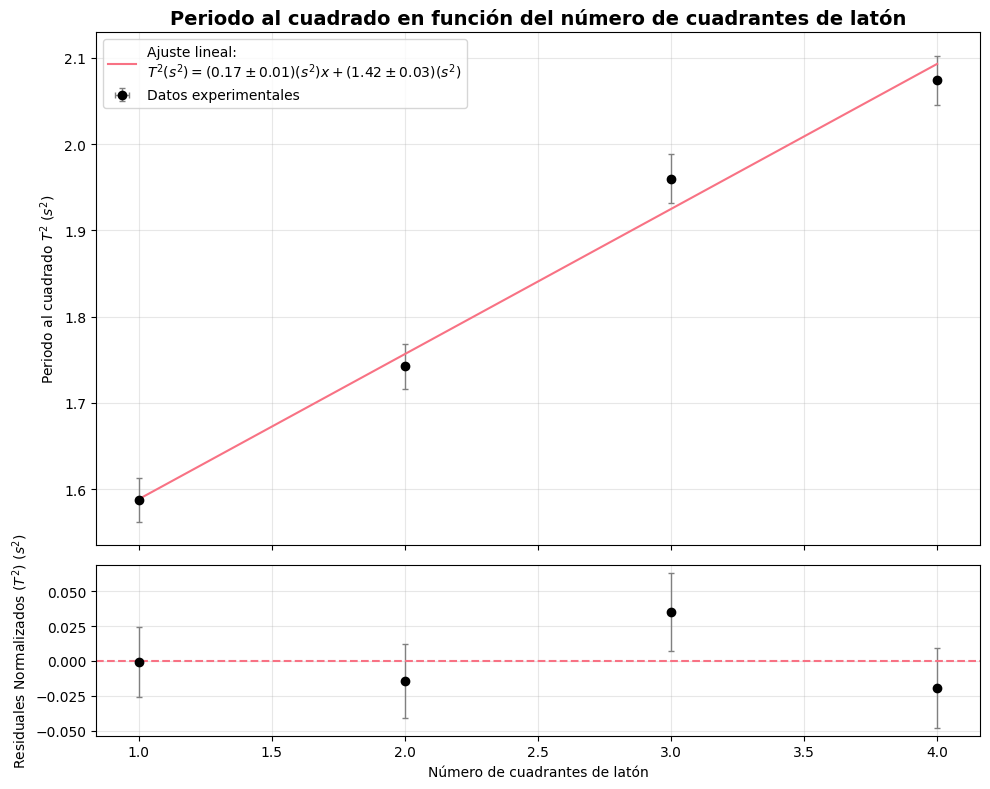

Pendiente: 0.17 ± 0.01
Intercepto: 1.42 ± 0.03
R²: 0.9872


In [ ]:
# Funciones para el ajuste
def f(x, m, b):
    return m*x + b

def format_with_error(value, error):
    """Devuelve valor ± error con 1 cifra significativa en el error"""
    if error == 0:
        return value, error
    err_rounded = float(f"{error:.1g}")
    decimals = -int(np.floor(np.log10(err_rounded)))
    val_rounded = round(value, decimals)
    err_rounded = round(err_rounded, decimals)
    return val_rounded, err_rounded

def fit_and_plot(ax1, ax2, x, y, yerr, title):
    # Ajuste
    popt, pcov = curve_fit(f, x, y, sigma=yerr, absolute_sigma=True)
    m, b = popt
    m_err, b_err = np.sqrt(np.diag(pcov))

    # Redondeo formal
    m_val, m_err = format_with_error(m, m_err)
    b_val, b_err = format_with_error(b, b_err)

    # R^2
    y_pred = f(x, m, b)
    resid = y - y_pred
    ss_res = np.sum(resid**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res/ss_tot

    # Gráfico principal 
    
    # Línea de ajuste suave
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    y_fit = f(x_fit, m, b)


    ax1.errorbar(x, y, xerr=des_in, yerr=yerr, fmt="o", color="black", ecolor="gray", elinewidth=1, capsize=2, label="Datos experimentales")

    ax1.plot(x_fit, y_fit, color="#F87284",
             label=(fr"Ajuste lineal:" "\n"
                    fr"$T^{2} (s^{2}) =({m_val}\pm{m_err}) (s^{2}) N +({b_val}\pm{b_err}) (s^{2})$"))

    ax1.legend()
    ax1.set_ylabel(r"Periodo al cuadrado $T^{2}$ ($s^{2}$)")
    ax1.set_title(title, fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    ax2.errorbar(x, resid, yerr=yerr, fmt="o", color="black",
                 ecolor="gray", elinewidth=1, capsize=2)
    ax2.axhline(0, color="#F87284", linestyle="--")
    ax2.set_xlabel(r"Número de cuadrantes de latón")
    ax2.set_ylabel(r"Residuales Normalizados ($T^{2}$) ($s^{2}$)")
    ax2.grid(True, alpha=0.3)
    
    return m_val, m_err, b_val, b_err, r2

# Crear figura y graficar PRIMER conjunto
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True,
                              gridspec_kw={'height_ratios': [3, 1]})
m3, m_err3, b3, b_err3, r2_1 = fit_and_plot(ax1, ax2, N, T2, in_T2, r"Periodo al cuadrado en función del número de cuadrantes de latón")
plt.tight_layout()
plt.show()

print(f"Pendiente: {m3} ± {m_err3}")
print(f"Intercepto: {b3} ± {b_err3}")
print(f"R²: {r2_1:.4f}")

In [95]:
#Cálculos
radio_interno = 0.0412
radio_externo = 0.0916
M = 0.2113

in_radios = 0.001
in_masa = 0.0001

constante_k = (np.pi**2 * M * (radio_interno**2 + radio_externo**2))/(2*m3)
constante_k

d_k_M = constante_k * (in_masa / M)
d_k_r_in = np.pi**2 * M * 2 * radio_interno * in_radios / (2 * m3)
d_k_r_ex = np.pi**2 * M * 2 *radio_externo * in_radios / (2 * m3)
d_k_m3 = -constante_k * (m_err3 / m3)

d_k = np.sqrt(d_k_M**2 + d_k_r_in**2 + d_k_r_ex**2 + d_k_m3**2)

print(f"\nConstante de torsión k: {constante_k:.4f} ± {d_k:.4f} N·m/rad")

#Cálculo del Momento de Inercia

I = b3 * constante_k / (4 * np.pi**2)

d_I_k = I * (d_k / constante_k)
d_I_b3 = I * (b_err3 / b3)
d_I = np.sqrt(d_I_k**2 + d_I_b3**2)

print(f"Momento de inercia I: {I:.4f} ± {d_I:.5f} kg·m²")



Constante de torsión k: 0.0619 ± 0.0038 N·m/rad
Momento de inercia I: 0.0022 ± 0.00015 kg·m²


In [ ]:
#Preguntar porque dan tan distinto las constantes de Torsión :'c

Tercera actividad

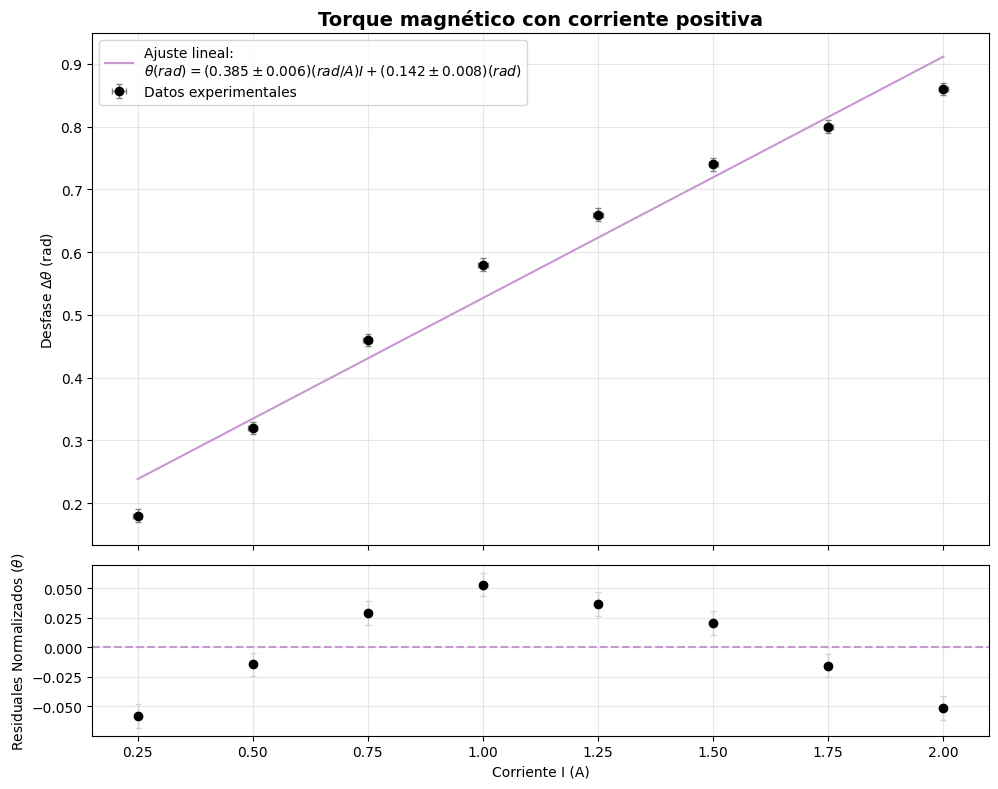

Primer conjunto - Datos: 8 puntos
Pendiente: 0.385 ± 0.006
Intercepto: 0.142 ± 0.008
R²: 0.9701


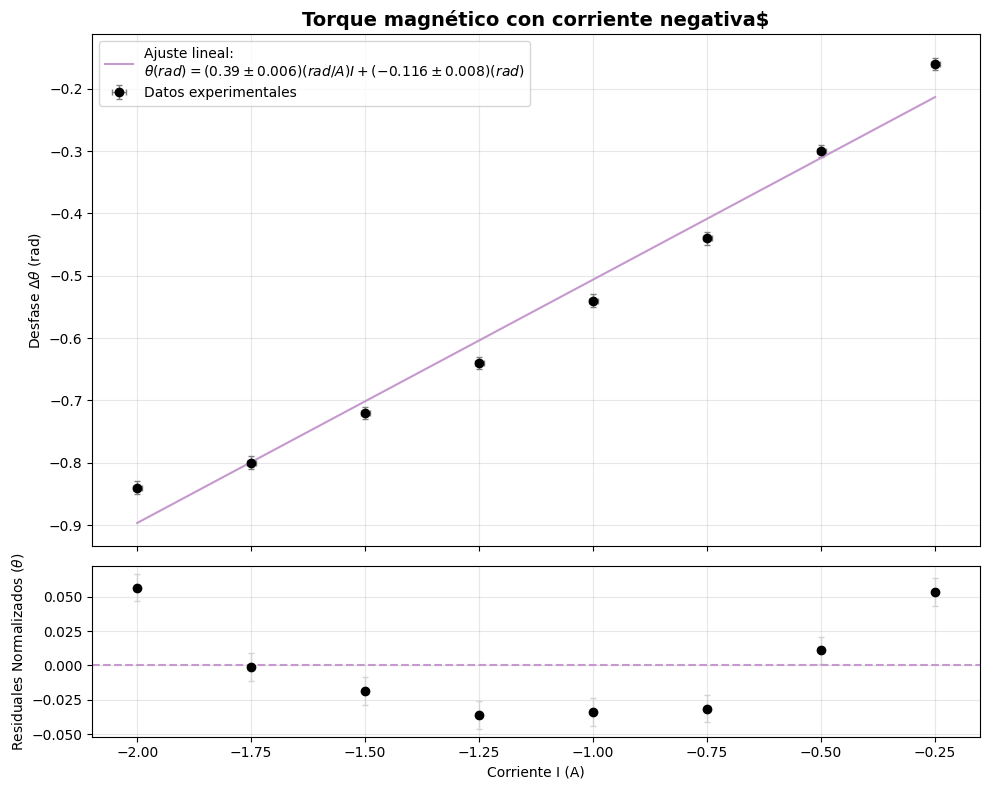


Segundo conjunto - Datos: 8 puntos
Pendiente: 0.39 ± 0.006
Intercepto: -0.116 ± 0.008
R²: 0.9757


In [100]:
pd_actividad3 = pd.read_excel('Datos_Oscilador.xlsx', header=47, usecols=['I (A)','Angulo (rad)', 'I 2 (A)', 'Angulo 2 (rad)'])
pd_actividad3 = pd_actividad3.iloc[:9]
pd_actividad3 = pd_actividad3.dropna(subset=['I (A)','Angulo (rad)', 'I 2 (A)', 'Angulo 2 (rad)'])

I1 = pd.to_numeric(pd_actividad3['I (A)'], errors='coerce')
I2 = pd.to_numeric(pd_actividad3['I 2 (A)'], errors='coerce')
a1 = pd.to_numeric(pd_actividad3['Angulo (rad)'], errors='coerce')
a2 = pd.to_numeric(pd_actividad3['Angulo 2 (rad)'], errors='coerce')


mask4 = np.isfinite(I1) & np.isfinite(I2) & np.isfinite(a1) & np.isfinite(a2)
I1 = I1[mask4]
I2 = I2[mask4]
a1 = a1[mask4]
a2 = a2[mask4]


in_I = 0.01 #A
in_a = 0.01 #rad


# Funciones para el ajuste
def f(x, m, b):
    return m*x + b

def format_with_error(value, error):
    """Devuelve valor ± error con 1 cifra significativa en el error"""
    if error == 0:
        return value, error
    err_rounded = float(f"{error:.1g}")
    decimals = -int(np.floor(np.log10(err_rounded)))
    val_rounded = round(value, decimals)
    err_rounded = round(err_rounded, decimals)
    return val_rounded, err_rounded

def fit_and_plot(ax1, ax2, x, y, yerr, title):
    # Ajuste
    popt, pcov = curve_fit(f, x, y, sigma=yerr, absolute_sigma=True)
    m, b = popt
    m_err, b_err = np.sqrt(np.diag(pcov))

    # Redondeo formal
    m_val, m_err = format_with_error(m, m_err)
    b_val, b_err = format_with_error(b, b_err)

    # R^2
    y_pred = f(x, m, b)
    resid = y - y_pred
    ss_res = np.sum(resid**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res/ss_tot

    # Gráfico principal 
    
    # Línea de ajuste suave
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    y_fit = f(x_fit, m, b)


    ax1.errorbar(x, y, xerr=des_in, yerr=yerr, fmt="o", color="black", ecolor="gray", elinewidth=1, capsize=2, label="Datos experimentales")

    ax1.plot(x_fit, y_fit, color="#C699CE",
             label=(fr"Ajuste lineal:" "\n"
                    fr"$\theta (rad) =({m_val}\pm{m_err}) (rad/A) I +({b_val}\pm{b_err}) (rad)$"))

    ax1.legend()
    ax1.set_ylabel(r"Desfase $ \Delta \theta$ (rad)")
    ax1.set_title(title, fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    ax2.errorbar(x, resid, yerr=yerr, fmt="o", color="black",
                 ecolor="lightgray", elinewidth=1, capsize=2)
    ax2.axhline(0, color="#C699CE", linestyle="--")
    ax2.set_xlabel(r"Corriente I (A)")
    ax2.set_ylabel(r"Residuales Normalizados ($\theta$)")
    ax2.grid(True, alpha=0.3)
    
    return m_val, m_err, b_val, b_err, r2

# Crear figura y graficar PRIMER conjunto
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True,
                              gridspec_kw={'height_ratios': [3, 1]})
m4, m_err4, b4, b_err4, r2_4 = fit_and_plot(ax1, ax2, I1, a1, in_a, r"Torque magnético con corriente positiva")
plt.tight_layout()
plt.show()

print(f"Primer conjunto - Datos: {len(I1)} puntos")
print(f"Pendiente: {m4} ± {m_err4}")
print(f"Intercepto: {b4} ± {b_err4}")
print(f"R²: {r2_4:.4f}")

# Crear figura y graficar SEGUNDO conjunto
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
m5, m_err5, b5, b_err5, r2_5 = fit_and_plot(ax1, ax2, I2, a2, in_a, r"Torque magnético con corriente negativa$")
plt.tight_layout()
plt.show()

print(f"\nSegundo conjunto - Datos: {len(I2)} puntos")
print(f"Pendiente: {m5} ± {m_err5}")
print(f"Intercepto: {b5} ± {b_err5}")
print(f"R²: {r2_5:.4f}")


In [103]:
#Cálculo del dipolo magnetico

helmholtz = 3234e-6 # T/A
dipolo1 = m4 * constante_k / helmholtz

dipolo1

#Incertidumbre de u

d_dipolo1_m4 = dipolo1 * (m_err4 / m4)
d_dipolo1_k = dipolo1 * (d_k / constante_k)
d_dipolo1 = np.sqrt(d_dipolo1_m4**2 + d_dipolo1_k**2)

print(f"\nDipolo magnético (corriente positiva): {dipolo1:.6f} ± {d_dipolo1:.6f} A·m²")


Dipolo magnético (corriente positiva): 7.366244 ± 0.471659 A·m²
